In [1]:
import pandas as pd

## 1.

In [52]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 2.

In [56]:
df_piv = df.pivot_table(values='manner_of_death', index='race', columns='signs_of_mental_illness', aggfunc=len)
df_piv

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


## 3.

In [94]:
def pct_of_ment_ill(row):
    return row[True] / (row[False] + row[True])

In [98]:
df_piv['pct_signs_of_mental_illness'] = df_piv.apply(lambda row: pct_of_ment_ill(row).round(2), axis=1)
df_piv

signs_of_mental_illness,False,True,pct_signs_of_mental_illness
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


In [104]:
df_piv[df_piv['pct_signs_of_mental_illness'] == df_piv['pct_signs_of_mental_illness'].max()]

signs_of_mental_illness,False,True,pct_signs_of_mental_illness
race,,,
W,1763,713,0.29


## 4.

In [117]:
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [221]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_gr = df.groupby('day_name').count()
df_gr = df_gr.reindex(index=week_days)
df_gr.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
day_name,,,,,,,,,,,,,,
Monday,726,726,726,726,698,700,726,671,726,726,726,726,696,726
Tuesday,816,816,816,816,781,789,815,735,816,816,816,816,770,816
Wednesday,829,829,829,829,787,785,829,758,829,829,829,829,790,829
Thursday,810,810,810,810,785,775,810,734,810,810,810,810,767,810
Friday,761,761,761,761,729,715,761,674,761,761,761,761,722,761


In [223]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Police fatal shootings')

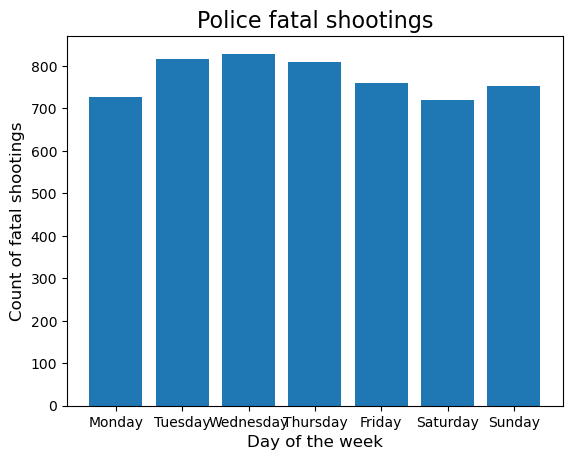

In [281]:
plt.bar(df_gr.index, df_gr['id'])
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Count of fatal shootings', fontsize=12)
plt.title('Police fatal shootings', fontsize=16)

Próbowałem coś zrobić żeby nazwy dni tygodnia na siebie nie nachodziły, ale nie znalazłem rozwiązania. Najlepiej jakby były zapine pod skosem, ale nie wiem jak to zrobić.

## 5.

In [375]:
df_pop = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
df_pop = df_pop[0]
df_pop.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1.0,1.0,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2.0,2.0,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3.0,4.0,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4.0,3.0,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5.0,6.0,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [376]:
df_pop = df_pop[['State', 'Census population, April 1, 2020 [1][2]']]
df_pop.rename(columns={'Census population, April 1, 2020 [1][2]':'population'}, inplace=True)
df_pop.head()

,State,population
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [379]:
df_abbr = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')
df_abbr = df_abbr[1]
df_abbr.head()

Name Status of region  \
                       Name Status of region   
0  United States of America    Federal state   
1                   Alabama            State   
2                    Alaska            State   
3                   Arizona            State   
4                  Arkansas            State   

                                                 ISO               ANSI  \
                                  Unnamed: 2_level_1 Unnamed: 3_level_1   
0  .mw-parser-output .monospaced{font-family:mono...                 US   
1                                              US-AL                 AL   
2                                              US-AK                 AK   
3                                              US-AZ                 AZ   
4                                              US-AR                 AR   

                                   USPS               USCG     GPO      AP  \
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1     GPO      AP   
0                0.0                NaN                NaN    U.S.    U.S.   
1                1.0                 AL                 AL    Ala.    Ala.   
2                2.0                 AK                 AK  Alaska  Alaska   
3                4.0                 AZ                 AZ   Ariz.   Ariz.   
4                5.0                 AR                 AR    Ark.    Ark.   

  Other abbreviations  
  Other abbreviations  
0              U.S.A.  
1                 NaN  
2              Ak.[2]  
3                 NaN  
4                 NaN

In [381]:
df_abbr = df_abbr[['Name', 'USPS']]
df_abbr.set_axis(['State', 'abbr'], axis=1, inplace=True)
df_abbr.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_2688\3228179279.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_abbr.set_axis(['State', 'abbr'], axis=1, inplace=True)


,State,abbr
0,United States of America,NaN
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR


In [383]:
df_pop_abbr = pd.merge(df_pop, df_abbr, how='inner', on='State')
df_pop_abbr.drop('State', axis=1, inplace=True)
df_pop_abbr.rename(columns={'abbr':'state'}, inplace=True)
df_pop_abbr.head()

,population,state
0,38538223,CA
1,30145505,TX
2,21538187,FL
3,20201249,NY
4,13002700,PA


In [422]:
df_gr_st = df.groupby('state').count()['id']
df_gr_st = pd.merge(df_gr_st, df_pop_abbr, how='inner', on='state')
df_gr_st.rename(columns={'id':'fatal_intervention'}, inplace=True)
df_gr_st.head()

,state,fatal_intervention,population
0,AK,39,733391
1,AL,104,5024279
2,AR,83,3011524
3,AZ,254,7151502
4,CA,799,38538223


In [437]:
def inc_per_1000(row):
    return row['fatal_intervention'] / (row['population'] / 1000)

In [439]:
df_gr_st['incidents_per_1000'] = df_gr_st.apply(lambda row: inc_per_1000(row), axis=1)
df_gr_st.head()

,state,fatal_intervention,population,incidents_per_1000
0,AK,39,733391,0.053178
1,AL,104,5024279,0.020699
2,AR,83,3011524,0.027561
3,AZ,254,7151502,0.035517
4,CA,799,38538223,0.020733
